<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/fmottes/unito-neural-networks/blob/master/01%20-%20Data%20Manipulation%20and%20Perceptron.ipynb">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="width:175px;"/>
    </a>
  </td>
</table>

# <center> **Neural Networks** (MFN0824) </center>

### Lectures: _Dr. Matteo Osella_
### Notebooks: _Francesco Mottes_
<br>

---

From this point on we dive deeper into the topics that are specific of the Neural Networks course. It is recommended to build a bit of confidence with the Python language and the Jupyter notebook environment before going through the following material. Reviewing the some fundamental concepts of machine learning is also advised, although we will try to give (brief) explanations of some basics.

The reference book for the practical part of this course is:
- *Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow - A. Géron*

The whole first half of the book is dedicated to an introduction to classical Machine Learning, using the python scikit-learn library. It is an excellent place for reviewing basic concepts and to be introduced to the Jupyter notebook environment and the scikit-learn library. There is also a [free github page](https://github.com/ageron/handson-ml2) where you can find some notebooks with the code from the book, a good place to start if you want to look into more advanced topics.

**NOTE:** You can easily (and legally) find online a raw and unedited version of the second edition of the book, released by the author before the book was finished. Be advised that, besides not being the revised version, **it is not even the whole book**.

### Python modules references:
- Numpy Docs: https://numpy.org/
- Matplotlib Docs: https://matplotlib.org/
- Scikit-learn Docs: https://scikit-learn.org/

# <center> **01 - Data Manipulation and Perceptron** </center>

In this notebook we will show in which format data usually come in when facing machine learning problems. We will the implement from scratch the perceptron algorithm and a fully-connected feed-forward neural network with back-propagation and mini-batch Stochastic Gradient Descent (SGD). We will apply the algorithms to two simple mock datasets, in order to better understand the limits of the Perceptron.

## <center> **Data Manipulation** </center>

In supervised learning tasks, we give to the chosen algorithm a set of *N* observations with an associated label (class to which the given observation belongs). In order to be manipulated in a mathematically convenient way, observations are represented as **feature vectors**: we take the set of *D* measured features associated with one observation and we put it into a vector, such that two different observations are represented as two points in a D-dimensional space.

$$
{\rm feature~vector:~~~} {\bf x}~=~ [x_1, x_2, x_3, \cdots, x_D]
$$

Taking a step further, we can then stack all the N vectors of our observations horizontally, one on top of the other. What we get is a NxD matrix that summarizes all of our data: each row corresponds to a different observation, each column corresponds to a different feature of the observations. Such a matrix is generally called **data matrix** or **feature matrix** and is indicated with **X**.

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right] ~=~\left[
\begin{matrix}
{\bf x_{1}}\\
{\bf x_{2}}\\
{\bf x_{3}}\\
\vdots\\
\vdots\\
{\bf x_{N}}\\
\end{matrix}
\right]
$$

Lastly, we can organize also the labels of the observations in a convenient N-dimensional vector, called **label vector** and generally indicated with the **y** letter. In such a vector, the number at the n-th position represents the class to which the n-th row of the data matrix belongs.

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots, y_N]
$$

When dealing with neural networks and data with more than two classes, another notation is preferred for expressing the label of one observation, the so-called [one-hot encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding). If data come in *K* different categories, to each observation is associated a K-dimensional vector where all entries are zero, except for the one representing the class of the oservation, which is set to one.

Suppose to have K=3 different classes in your data, and that the chosen sample belongs to the third class. The one-hot encoding of the class label "3" would be:

$$
\left[
\begin{matrix}
{0}\\
{0}\\
{1}\\
\end{matrix}
\right]
$$

In [1]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt


#function for fast generation of training and test set from data
from sklearn.model_selection import train_test_split

## <center> Synthetic Data </center>

We now create two simple synthetic 2-dimensional datasets, that we will use in the following to visualize the performances of our hand-made Perceptron and feed-forward neural network.

In [2]:
#generators of very simple 2d datasets we will use in the following
from sklearn.datasets import make_blobs, make_moons

In [3]:
#fix parameters
N = 200 #number of observations
D = 2 # features per sample
test_size = .25 #test data are 25% of all data

rnd_state = 42 #random numbers genereator initial state, fixed for reproducibility
np.random.seed(rnd_state)

### GENERATE BLOBS

In [4]:
#generate two blobs, one for each class, of 2D data
X_blob, y_blob = make_blobs(n_samples=N, n_features=D, centers=2)

#generate training and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=test_size)

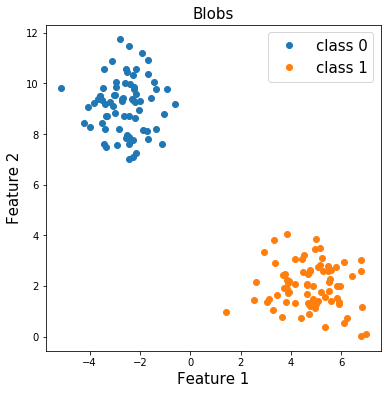

In [5]:
#plot the blob dataset

fig, ax = plt.subplots(figsize=(6,6))

fontsize = 15

#plot the points of the first class:
mask = y_blob_train == 0

ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], 'o', label='class 0') #plot first feature on x-axis and second feature on y-axis


#plot the points of the second class:
mask = y_blob_train == 1

ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], 'o', label='class 1') #plot first feature on x-axis and second feature on y-axis



ax.legend(fontsize=fontsize)

ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)

ax.set_title('Blobs', fontsize=fontsize);

### GENERATE SEMI-CIRCLES

In [6]:
#generate two semi-circles, one for each class, of 2D data
#(we don't get to choose the data dimension here, it's always 2D)
X_moon, y_moon = make_moons(n_samples=N, noise=.1)

#generate training and test set
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon, y_moon, test_size=test_size)

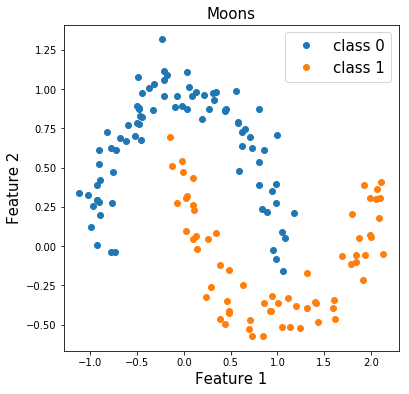

In [7]:
#plot the blob dataset

fig, ax = plt.subplots(figsize=(6,6))

fontsize = 15

#plot both classes as above, but all at once
for cat in np.unique(y_moon_train): #loop over unique class IDs
    
    mask = y_moon_train == cat
    
    ax.plot(X_moon_train[mask][:,0], X_moon_train[mask][:,1], 'o', label='class {}'.format(cat))



ax.legend(fontsize=fontsize)

ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)

ax.set_title('Moons', fontsize=fontsize);

## <center> "Real" Data </center>

Data can come in many different formats and data manipulation and pre-processing is, most of the times, data-specific. Here we see two very simple cases, that are loading "classic" datasets that come shipped with many libraries (in this case scikit-learn) and loading datasets from an external file. There are a lot of different ways to do such things, especially loading data from a file, and many times we have to use different ways for different data. What's more, many libraries come with their own utilities to load data in a conveninet way, so feel free to research different methods and adopt the one you feel most comfortable with.

### Datasets coming with a library

In [8]:
#load utility for the simple Iris dataset
from sklearn.datasets import load_iris

In [9]:
#load the iris dataset
iris_data = load_iris()

#scikit-learn loading methods return a Bunch object (defined inside scikit-learn)
#It beahaves essentially like a python dictionary and contains some useful meta-information on the dataset

In [10]:
#dataset description
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
#extract data matrix
X = iris_data['data']

#extract categories
y = iris_data['target']

In [12]:
#print features names
print(iris_data.feature_names) #another way in which you can access fields of a Bunch object

#show first 3 samples
print(X[:3])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [13]:
#print the meaning of the categories
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


### Datasets coming from an external file

We will now load the same iris dataset directly from the .csv in which the data are stored, without relying on the scikit-learn utility function. You can find the .csv file in the 'datasets/' folder. 

In [14]:
#open the file in reading mode
with open('datasets/iris.csv', 'r') as fh:
    
    #read first line (header)
    features = fh.readline()
    
    #split the line, make list of names of features
    features = features.split(',')
    
    #remove spaces before and after feature names
    features = [f.strip() for f in features]
    
    #now load the rest of the dataset - feature vectors - into a data matrix
    X = np.loadtxt(fh, dtype=float, delimiter=',')
    
    #file stream gets automatically closed at the end of the 'with' statement 

In [15]:
#remember that the last column contains the labels, we want them into a separate vector
y = X[:,-1]

#drop last column from data matrix
X = X[:,:-1]

In [16]:
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [17]:
print('Shape of data matrix:', X.shape)
print('Shape of target vector:', y.shape)

Shape of data matrix: (150, 4)
Shape of target vector: (150,)


## <center> **The Perceptron** </center>

Now that we have our data we can start looking into the simplest possible neural network: the **perceptron**. At its core, the perceptron is just a non-linear activation function (the Heaviside theta) applied to a (linear) weighted sum of the data features, coupled with a rough version of SGD for tuning the weights. The schema of the computation is summarized in the figure below (in the figure, the dimensionality of the input vector is called _n_ istead of _D_)

![The Perceptron](img/perceptron.png)

What this means, practically, is that all it takes to build a perceptron in python is a numpy array holding the lalues of the weights (+1 float variable for the bias, which can be embedded into the weight vector as an extra dimension). Then we will need an algorithm that tells us how to update the weights, the Perceptron Learning Algorithm (PLA).

The PLA works in two steps, repeated for each sample in the training set. Every time the PLA goes through a complete scan of all the samples and needs to start again, we say it has trained for one **epoch**. The two steps of the algorithm are the following:

> Repeat the two steps for a predefined number of epochs or until convergence (when all samples are correctly classified):
>
> * Predict the label of the sample based on current weights **w**:
$$
\hat{y} = \theta ( \textbf{x} \cdot \textbf{w} + b) = \theta (\displaystyle\sum_{i=0}^{D} x_i w_i + b)
$$
>
> * Update the weights **w** with the following expression:
$$
w_i \leftarrow w_i + \eta (y-\hat{y}) x_i\\
b \leftarrow b + \eta (y-\hat{y}) b
$$

**NOTE:** if the sample is correctly classified there is no update of the weights (the difference between the predicted and actual label is zero). If the sample is incorrectly classified the update step pushes the weights towards a correct classification. The parameter ${\bf \eta}$ tunes how strong each update should be and it is called **learning rate**.

### Perceptron Implementation

In [18]:
# we now implement the perceptron model with a bunch of separate functions
# the implementation as a class is left as a guided exercise


def pla_step(weights, bias, x, y, eta=1):
    '''
    Performs PLA on a single sample.
    
    Parameters:
    -----------
    
    weights : array
        Current weights of the perceptron.
        
    bias : float
        Current bias term of the perceptron.

    x : array
        Incoming observation.
        
    y : int or float
        True label of the observation.
        
    eta : float (default: 1)
        Learning rate.
        

    Returns:
    --------
        
    weights : array
        Updated weights.
        
    bias : float
        Updated bias.
    
    w_updated : bool
        Whether the weights were updated or not.
    '''
    
    z_pred = x.dot(weights)+bias  # calculate weighted sum
    
    y_pred = np.heaviside(z_pred,0) #returns 0 if the argument is exactly 0
    
    
    # if prediction is wrong update weights and bias
    if y != y_pred:
        
        weights += eta*(y-y_pred)*x
        bias += eta*(y-y_pred)*1
            
        w_updated = True
        
    else:
        #right classification, do nothing
        w_updated = False
        
        
    return weights, bias, w_updated

In [19]:
def perceptron_train(X, y, eta=1, max_epochs=10, error_history=True):
    '''
    Performs full PLA on new perceptron, stops on specified number of epochs or upon convergence (no errors).
    Returns weights and bias term of the trained perceptron, plus the number of errors at each epoch (optional).
    
    Parameters:
    -----------

    X : 2d array
        Data matrix (training set).
        
    y : array
        Label vector for the training set.
        
    eta : float (default: 1)
        Learning rate.
        
    max_epochs : int (default: 10)
        Maximum number of epochs for learning.
        
    error_history : bool (default: True)
        If True also returns number of errors of the perceptron at each training epoch.
        

    Returns:
    --------
        
    weights : array
        Trained weights.
        
    bias : float
        Trained bias.
        
    history : array (optional)
        Number of errors of the perceptron at each trining epoch.
    
    '''
    
    
    #initialize weights and bias
    w = np.zeros(X.shape[1]) #dimension of input data, in our case 2d
    b = 0.
    
    
    errors = []
    
    #create an array with the index of every sample
    #we will need it to loop through samples in random order
    index = np.arange(X.shape[0]).astype(int)

    converged = False
    epoch = 0
    
    #repeat training for given epochs or until convergence
    while not converged and epoch < max_epochs:
        
        #shuffle ordering in which we will get the samples
        np.random.shuffle(index)

        #keep track of number of updates in this epoch
        n_updates = 0

        #loop through each sample in the new ordering and train
        for idx in index:

            w, b, updated = pla_step(w, b, X[idx], y[idx], eta) #training step

            n_updates += int(updated)

            
            
        errors.append(n_updates) #update only happen if the prediction was wrong

        
        #check for convergence
        if 0 == n_updates:
            converged = True
            print('Perceptron converged on epoch {}!'.format(epoch))
            
        epoch += 1
        
        
    if error_history:        
        return w, b, errors
    else:
        return w, b

In [20]:
def perceptron_predict(weights, bias, X):
    '''
    Predicts the labels of the given data using parameters from a trained perceptron.
    
    Parameters:
    -----------
    
    weights : array
        Trained weights.
        
    bias : float
        Trained bias.
        
    X : 2d array
        Data matrix (test set).
        
        
    Returns:
    --------
    y_pred : array
        Predicted label vector for X.
        
    '''
    
    #fully vectorized code
    z_pred = X.dot(w)+b
    y_pred = np.heaviside(z_pred,0)
    
    return y_pred

### Perceptron on BLOBS

In [27]:
#Train the perceptron on the blobs dataset, with default parameters
w, b, training_errors = perceptron_train(X_blob_train, y_blob_train)

#number of training errors in last epoch
print('Number of training errors:\t{} ({} %)'.format(training_errors[-1], training_errors[-1]/X_blob_train.shape[0]*100))

Perceptron converged on epoch 1!
Number of training errors:	0 (0.0 %)


In [28]:
#evaluate performance of trained perceptron on test set
y_pred = perceptron_predict(w, b, X_blob_test)

test_errors = np.sum(y_pred != y_blob_test)

print('Number of testing errors:\t{} ({} %)'.format(test_errors, test_errors/X_blob_test.shape[0]*100))

Number of testing errors:	0 (0.0 %)


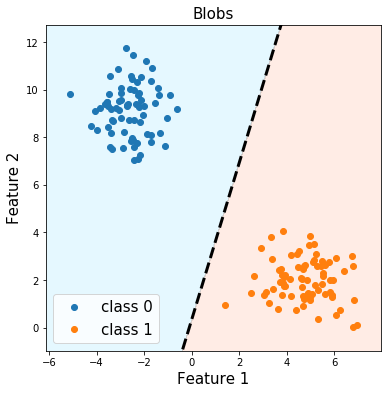

In [29]:
#visualize prediction boundary on blobs dataset

fig, ax = plt.subplots(figsize=(6,6))

fontsize = 15

#----------------------------------------------------------------
### VISUALIZE BLOBS TRAINIG DATASET (with correct classification)


#plot the points of the first class:
mask = y_blob_train == 0

ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], 'o', label='class 0') #plot first feature on x-axis and second feature on y-axis


#plot the points of the second class:
mask = y_blob_train == 1

ax.plot(X_blob_train[mask][:,0], X_blob_train[mask][:,1], 'o', label='class 1') #plot first feature on x-axis and second feature on y-axis

#----------------------------------------------------------------
### Visualize perceptron's prediction field

# generate square mesh of points to evaluate, with "n_pts_side" ponits per side
n_pts_side = 500
pad = 1

#extrema change based on generated points
xx_min = X_blob[:,0].min()-pad
xx_max = X_blob[:,0].max()+pad

yy_min = X_blob[:,1].min()-pad
yy_max = X_blob[:,1].max()+pad

xx = np.linspace(xx_min, xx_max, n_pts_side)  
yy = np.linspace(yy_min, yy_max, n_pts_side)

#plot decision line
ax.plot(xx, (-b-w[0]*xx)/w[1], 'k--', linewidth=3)


# plot decision field
xx, yy = np.meshgrid(xx, yy)

zz = perceptron_predict(w, b, np.vstack([xx.ravel(),yy.ravel()]).T) #generate predictions for each point in field
zz = zz.reshape(xx.shape)

ax.contourf(xx, yy, zz, levels=2, colors=('deepskyblue','k','orangered'), alpha=.1)

#----------------------------------------------------------------

ax.set_xlim(xx_min, xx_max)
ax.set_ylim(yy_min, yy_max)


ax.legend(fontsize=fontsize)

ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)

ax.set_title('Blobs', fontsize=fontsize);

### Perceptron on MOONS

In [30]:
#Train the perceptron on the moons dataset, with default parameters
w, b, training_errors = perceptron_train(X_moon_train, y_moon_train)

#number of training errors in last epoch
print('Number of training errors:\t{} ({} %)'.format(training_errors[-1], training_errors[-1]/X_moon_train.shape[0]*100))

Number of training errors:	24 (16.0 %)


In [31]:
#evaluate performance of trained perceptron on test set
y_pred = perceptron_predict(w, b, X_moon_test)

test_errors = np.sum(y_pred != y_moon_test)

print('Number of testing errors:\t{} ({} %)'.format(test_errors, test_errors/X_moon_test.shape[0]*100))

Number of testing errors:	14 (28.000000000000004 %)


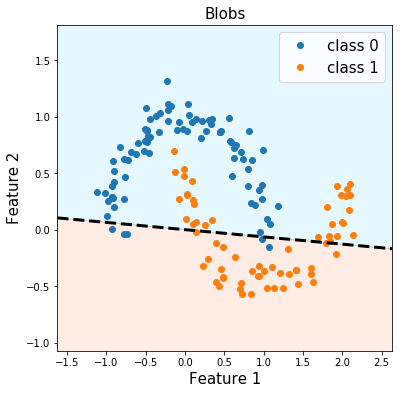

In [32]:
#visualize prediction boundary on moons dataset

fig, ax = plt.subplots(figsize=(6,6))

fontsize = 15

#----------------------------------------------------------------
### VISUALIZE BLOBS TRAINIG DATASET (with correct classification)


#plot the points of the first class:
mask = y_moon_train == 0

ax.plot(X_moon_train[mask][:,0], X_moon_train[mask][:,1], 'o', label='class 0') #plot first feature on x-axis and second feature on y-axis


#plot the points of the second class:
mask = y_moon_train == 1

ax.plot(X_moon_train[mask][:,0], X_moon_train[mask][:,1], 'o', label='class 1') #plot first feature on x-axis and second feature on y-axis

#----------------------------------------------------------------
### Visualize perceptron's prediction field

# generate square mesh of points to evaluate, with "n_pts_side" ponits per side
n_pts_side = 500
pad = .5

#extrema change based on generated points
xx_min = X_moon[:,0].min()-pad
xx_max = X_moon[:,0].max()+pad

yy_min = X_moon[:,1].min()-pad
yy_max = X_moon[:,1].max()+pad

xx = np.linspace(xx_min, xx_max, n_pts_side)  
yy = np.linspace(yy_min, yy_max, n_pts_side)

#plot decision line
ax.plot(xx, (-b-w[0]*xx)/w[1], 'k--', linewidth=3)
ax.set_ylim(yy_min, yy_max)


# plot decision field
xx, yy = np.meshgrid(xx, yy)

zz = perceptron_predict(w, b, np.vstack([xx.ravel(),yy.ravel()]).T) #generate predictions for each point in field
zz = zz.reshape(xx.shape)

ax.contourf(xx, yy, zz, levels=2, colors=('deepskyblue','k','orangered'), alpha=.1)

#----------------------------------------------------------------

ax.set_xlim(xx_min, xx_max)
ax.set_ylim(yy_min, yy_max)

ax.legend(fontsize=fontsize)

ax.set_xlabel('Feature 1', fontsize=fontsize)
ax.set_ylabel('Feature 2', fontsize=fontsize)

ax.set_title('Blobs', fontsize=fontsize);

## <center> **Exercises** </center>

### Play with the code 

In order to gain a deeper understandig of what is happening in the code, try play a bit with it. 

* Re-run the perceptron algorithm on the given datasets for a number of times. Does it always find the same solution? 
* Change the parameters of the learning algorithm: does anything change? Can you reach a higher accuracy an the moons dataset? If so, in which way? If not, why? 
* Change the parameters in the functions that generate the synthetic datasets, how do they change? How do the results change? 

Make sure you understand what is happening in every line of the code, including the plotting code. Look into the matplotlib and numpy docs to understand the exact functioning of the functions you may have not seen before. Try to guess what are the values of the variables, then use Jupyter to look at what's inside them.

### Prediction boundaries with test data

In the prediction boundary plots only the training data are shown. Replicate the plots showing the test data instead. Show the samples that are correctly classified with the standard 'o' marker and samples classified incorrectly with an 'X' marker.

### Perceptron class

We implemented the perceptron algorithm with three separate functions. A more elegant and functional way to do this is to create a "Perceptron" class that contains both the parameters and the functions that should handle them. Try to implement a working Perceptron class, by following the provided blueprint and reusing the code of the previously implemented functions, with the due modifications.

In [174]:
class Perceptron():
    
    def __init__(self):
        
        #initialize and store perceptron parameters
        self.weights = None  #we don't know the dimension of the incoming data yet
        self.bias = 0.
        
        
    def _pla_step(self, x, y): #initial underscore is a standard way to signal "private" functions in python
        
        #use the code from the pla_step function
        
        #remember now you don't need to pass or return copies of w and b:
        #you can access and modify them directly from the function, using the self keyword!
        
        
        
        
        return w_updated
    
    
    def train(self, X, y, eta=1, max_epochs=10, error_history=True):
        
        
        #initialize weights with the correct dimension, if needed
        if None == self.weights:
            self.weights = np.zeros(X.shape[0])
            
        
        #from now on it works pretty much as the previous one
        #remember now you don't need to pass weight and bias term to _pla_step (note that the name has changed, btw)
        
        
        
        
        #return errors only if required
        if error_history:        
            return errors
        
        
    def predict(self, X):
    
    
        return y_pred

Train the new perceptron class on the blobs dataset. Does it work in the same way? Try to replicate the decision boundary figure with the new implementataion. Try to train it also on the moon dataset.

* Try to guess what happens when you re-train a trained perceptron with the old and the new implementation. Is there any difference?
* Go and look at the docs for the scikit-learn (much more complete) implementation of the [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Try to wrap your head around it.

In [ ]:
### TRAIN PERCEPTRON ON THE BLOBS DATASET

percpt = Perceptron()

#Train the perceptron on the blobs dataset, with default parameters
training_errors = percpt.train(X_blob_train, y_blob_train)

#number of training errors in last epoch
print('Number of training errors:\t{} ({} %)'.format(training_errors[-1], training_errors[-1]/X_blob_train.shape[0]*100))

### Multilabel Perceptron

Implement an algorithm based on perceptrons alone that can classify data with more than two labels (three labels is enough for a proof-of concept). Generate a mock dataset with three blobs (look at the docs of the function `make_blobs`). Plot the decision boundaries.

**Hint:** You don't need to change anything inside the _Perceptron_ class. Transform the data labels into _one-hot encoding_. Now you can use each sample to update one different perceptron for each of the three components of its label!